In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

### 1. Import and warehouse data: [ Score: 5 point ]

• Import all the given datasets. Explore shape and size.

• Merge all datasets onto one and explore final shape and size.

In [2]:
# Importing all the given datasets.
d1=pd.read_csv('TelcomCustomer-Churn_1.csv')
d2=pd.read_csv('TelcomCustomer-Churn_2.csv')

In [3]:
# Shape and Size of each dataset.
print('Shape of the dataset named "TelcomCustomer-Churn_1" is = '+str(d1.shape))
print('Size of the dataset named "TelcomCustomer-Churn_1" is = '+str(d1.size)+"\n")

print('Shape of the dataset named "TelcomCustomer-Churn_2" is = '+str(d2.shape))
print('Size of the dataset named "TelcomCustomer-Churn_2" is = '+str(d2.size))

Shape of the dataset named "TelcomCustomer-Churn_1" is = (7043, 10)
Size of the dataset named "TelcomCustomer-Churn_1" is = 70430

Shape of the dataset named "TelcomCustomer-Churn_2" is = (7043, 11)
Size of the dataset named "TelcomCustomer-Churn_2" is = 77473


In [4]:
# Merging all datasets onto one.
dres=pd.concat([d1, d2], axis=1)

In [5]:
# Exploring the shape and size of the resultant final dataset "dres".
print('Shape of the final dataset is = '+str(dres.shape))
print('Size of the final dataset is = '+str(dres.size))

Shape of the final dataset is = (7043, 21)
Size of the final dataset is = 147903


### 2. Data cleansing: [ Score: 10 point ]

• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

In [6]:
# Missing value treatment.
dres.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
dres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
for feature in dres.columns: # Loop through all columns in the dataframe
    if dres[feature].dtype == 'object': # Only apply for columns with categorical strings
        dres[feature] = pd.Categorical(dres[feature])# Replace strings with an integer
dres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [9]:
# converting the column named "TotalCharges" from object / string type to float
dres["TotalCharges"] = dres["TotalCharges"].replace(" ", np.nan)    # Replacing String " " with NaN in the column "TotalCharges".

dres["TotalCharges"] = pd.to_numeric(dres["TotalCharges"])       # Got this error: Unable to parse string " " at position 488

In [10]:
dres[dres.isna().any(axis=1)]          # printing rows with NaN values.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
dres.dropna(subset = ["TotalCharges"], inplace=True)       # Dropping all the rows with "TotalCharges" = NaN and "tenure" = 0 which will not add value to the analysis since TotalCharges divided by MonthlyCharges is approximately equal to tenure. And if tenure equals 0 then one can't predict if a customer will churn or not since that must be a new customer.

In [12]:
dres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [13]:
print(dres.gender.value_counts())
print()
print(dres.SeniorCitizen.value_counts())
print()
print(dres.Partner.value_counts())
print()
print(dres.Dependents.value_counts())
print()

#print(dres.tenure.value_counts())

print(dres.PhoneService.value_counts())
print()
print(dres.MultipleLines.value_counts())
print()
print(dres.InternetService.value_counts())
print()
print(dres.OnlineSecurity.value_counts())
print()
print(dres.OnlineBackup.value_counts())
print()
print(dres.DeviceProtection.value_counts())
print()
print(dres.TechSupport.value_counts())
print()
print(dres.StreamingTV.value_counts())
print()
print(dres.StreamingMovies.value_counts())
print()
print(dres.Contract.value_counts())
print()
print(dres.PaperlessBilling.value_counts())
print()
print(dres.PaymentMethod.value_counts())
print()

#print(dres.MonthlyCharges.value_counts())

#print(dres.TotalCharges.value_counts())

print(dres.Churn.value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

No                     2809
Yes     

In [14]:
# Convert categorical attributes to continuous using relevant functional knowledge.
replaceStruct = {
                "gender":{"Male": 1, "Female": 0},
                "Partner":{"Yes": 1, "No": 0},
                "Dependents":{"Yes": 1, "No": 0},
                "PhoneService":{"Yes": 1, "No": 0},
                "MultipleLines":{"Yes": 1, "No": 0, "No phone service": 0},
                "InternetService":{"Fiber optic": 1, "DSL": 1, "No": 0},
                "OnlineSecurity":{"Yes": 1, "No": 0, "No internet service": 0},
                "OnlineBackup":{"Yes": 1, "No": 0, "No internet service": 0},
                "DeviceProtection":{"Yes": 1, "No": 0, "No internet service": 0},
                "TechSupport":{"Yes": 1, "No": 0, "No internet service": 0},
                "StreamingTV":{"Yes": 1, "No": 0, "No internet service": 0},
                "StreamingMovies":{"Yes": 1, "No": 0, "No internet service": 0},
                "Contract":{"Month-to-month": 1,"One year": 2, "Two year": 3},
                "PaperlessBilling":{"Yes": 1, "No": 0},
                #"PaymentMethod":{"Mailed check": 1, "Electronic check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4},
                "Churn":     {"Yes": 1, "No": 0} 
                    }

In [15]:
dres=dres.replace(replaceStruct)
dres=pd.get_dummies(dres, columns=["PaymentMethod"])
dres.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,1,1,29.85,29.85,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,2,0,56.95,1889.50,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,1,1,53.85,108.15,1,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,0,2,0,42.30,1840.75,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,1,1,70.70,151.65,1,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,1,0,...,1,1,1,99.65,820.50,1,0,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,1,0,...,0,1,1,89.10,1949.40,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,1,...,0,1,0,29.75,301.90,0,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,1,1,0,...,1,1,1,104.80,3046.05,1,0,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,2,0,56.15,3487.95,0,1,0,0,0


In [16]:
# Drop attribute/s if required using relevant functional knowledge.
dropped_col=dres.pop("customerID")      # dropping the column named customerID since it adds no value to the analysis, and storing it in dropped_col for later use.

In [17]:
dres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   InternetService                          7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

### 3. Data analysis & visualisation: [ Score: 10 point ]

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [18]:
dres.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.783845,0.286547,0.344852,...,0.388367,1.688567,0.592719,64.798208,2283.300441,0.265785,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.411650,0.452180,0.475354,...,0.487414,0.832934,0.491363,30.085974,2266.771362,0.441782,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000


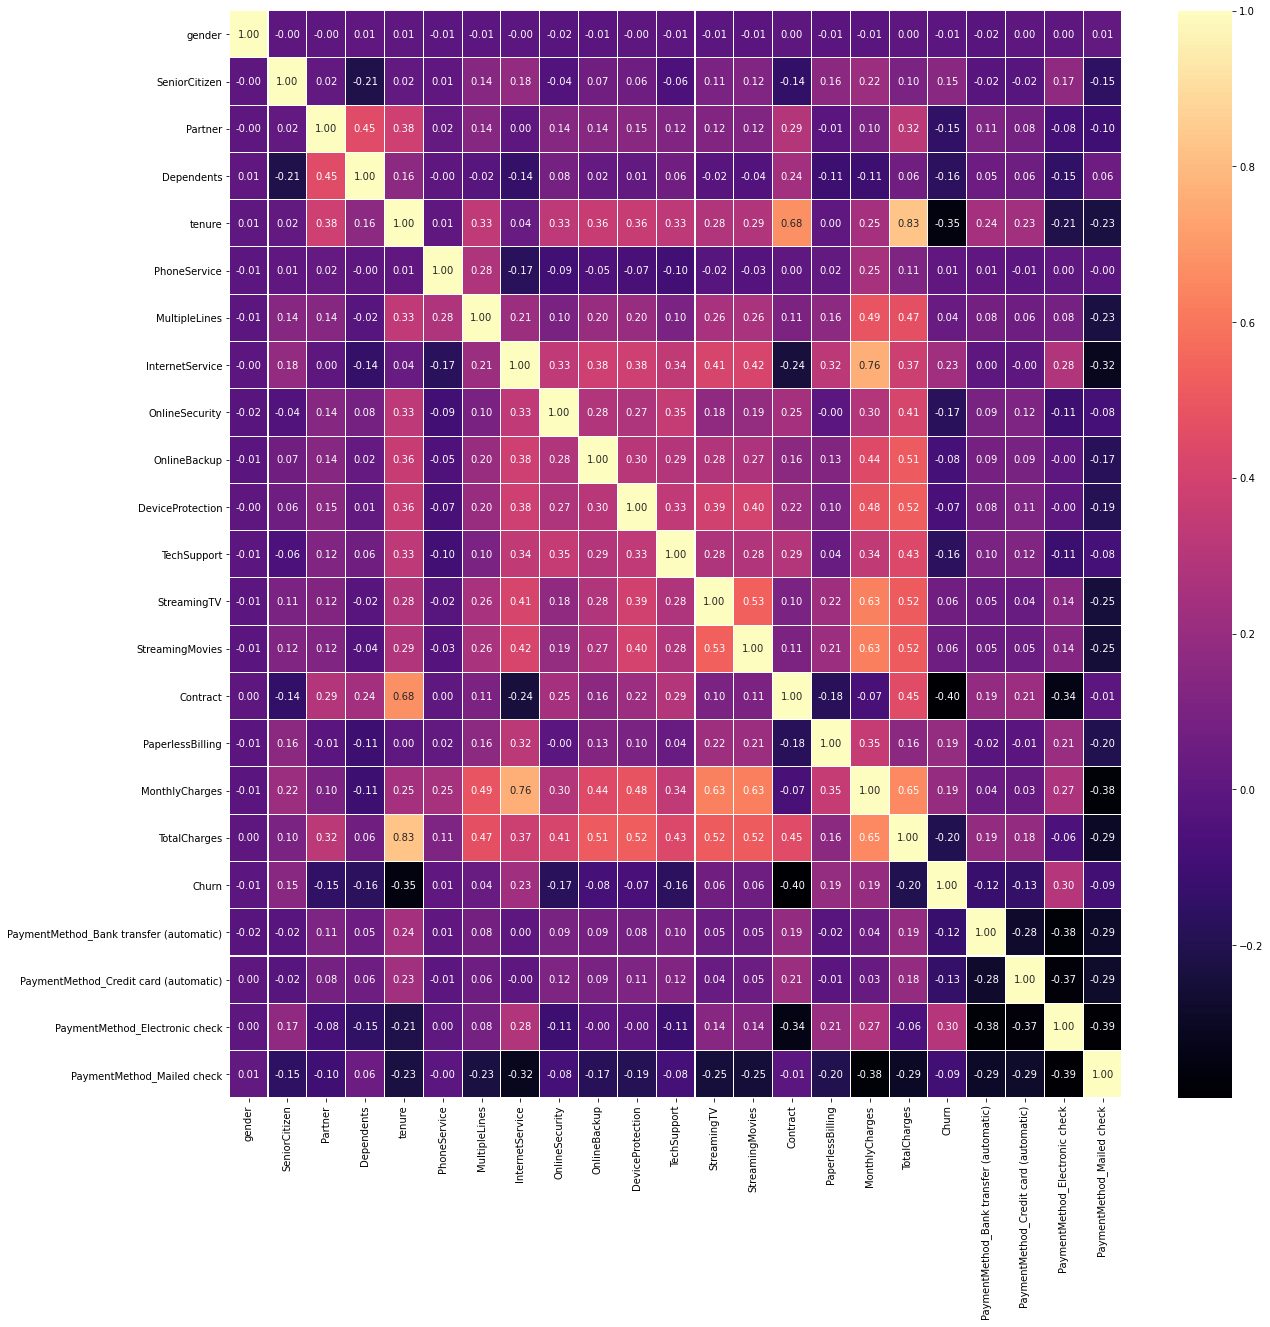

In [19]:
# The following correlation heat map suggests that only "tenure" and "Contract" are highly negatively correlated to "Churn" on comparison with other variables.

fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dres.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

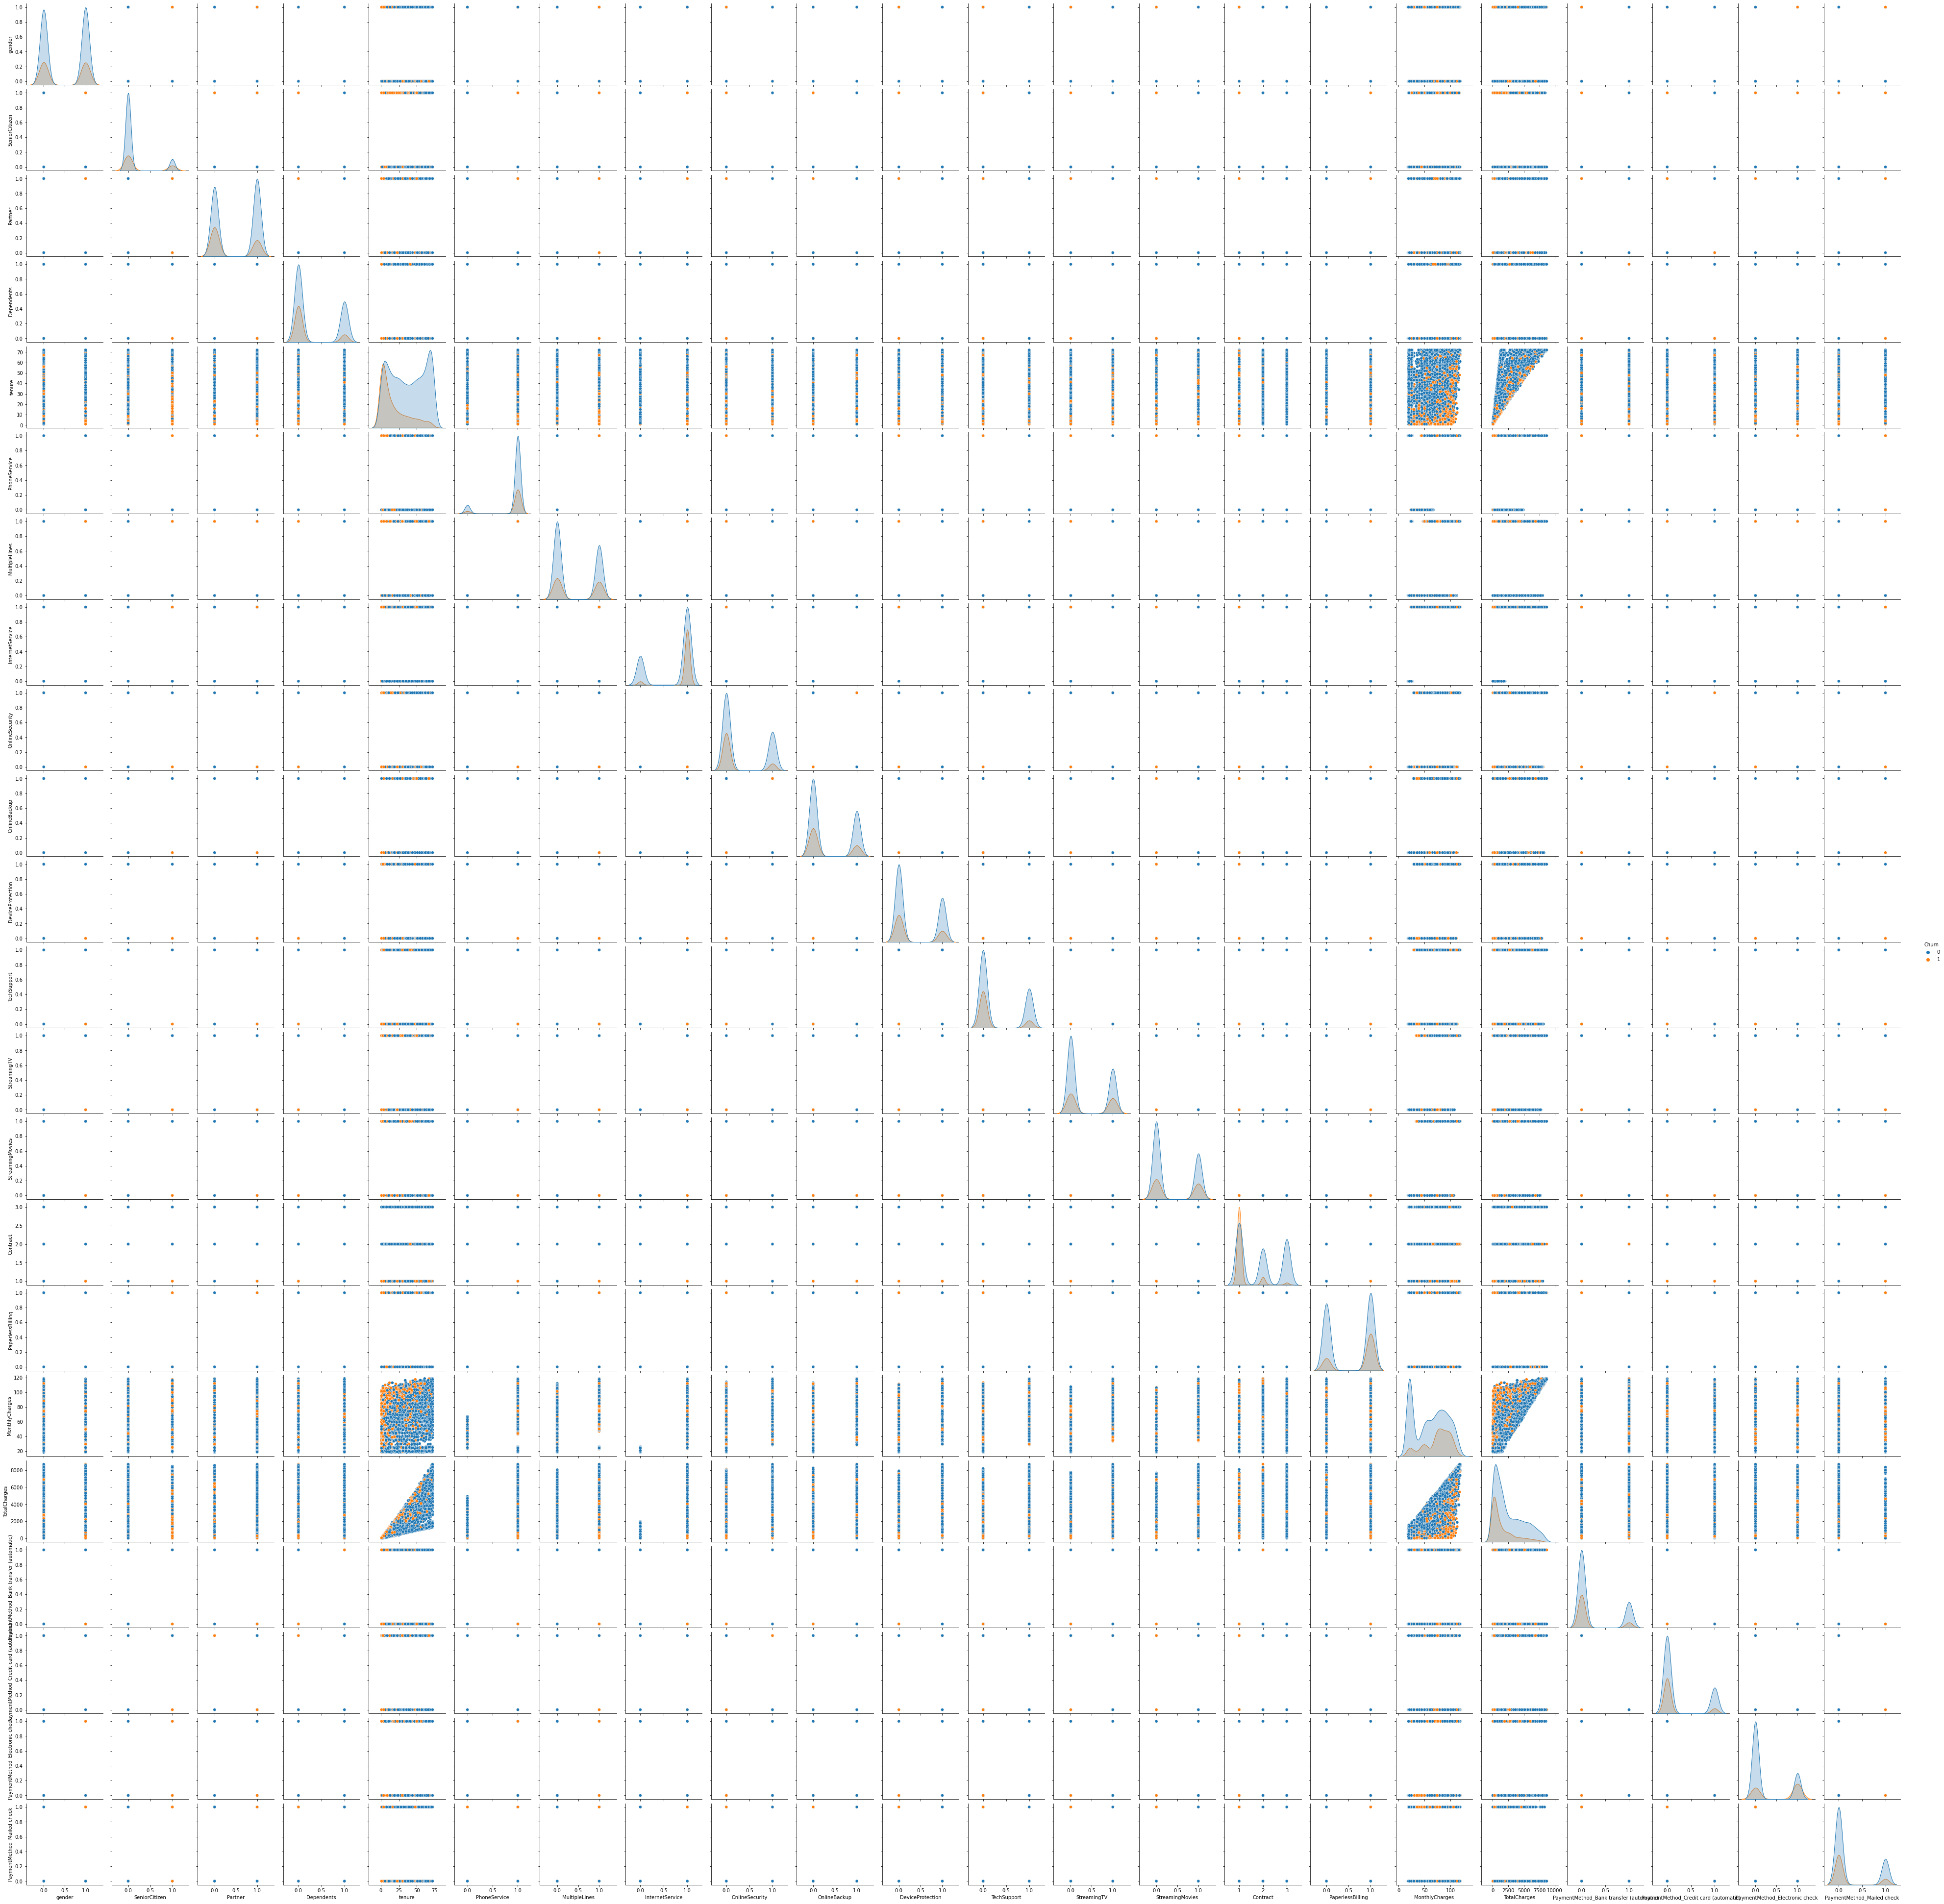

In [20]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
sns.pairplot(dres, diag_kind='kde', hue="Churn")

#The kde plot of "Contract" vs. "Contract" suggest that people with a monthly contract tend to churn more compared to the yearly and a two year "Contract".
#The above observation is in concurrence with the high negative correlation between "Contract" and "Churn".
#The kde plot of "Tenure" vs. "Tenure" suggest that people tend to churn less if the "Tenure" is high.
#The above interpretation is in concurrence with the high negative correlation between "Tenure" and "Churn".

### 4. Data pre-processing: [ Score: 5 point ]

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data.

In [21]:
#Segregate predictors vs target attributes.
X = dres.drop("Churn" , axis=1)          # Predictor Attributes.
y = dres.pop("Churn")                    # Target Attribute.

In [22]:
# Check for target balancing.

print("Churn True Values    : {0} ({1:0.2f}%)".format(len(y[y[:] == 1]), (len(y[y[:] == 1])/len(y)) * 100))
print("Churn False Values   : {0} ({1:0.2f}%)".format(len(y[y[:] == 0]), (len(y[y[:] == 0])/len(y)) * 100))

# Approximately 13:36 which is a good balance.

Churn True Values    : 1869 (26.58%)
Churn False Values   : 5163 (73.42%)


In [23]:
#Perform train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [24]:
#Check if the train and test data have similar statistical characteristics when compared with original data.
print("Training Churn True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Churn False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print()
print("Testing Churn True Values    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Testing Churn False Values   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

#Train and test data have similar statistical characteristics when compared with original data, i.e. they all are approximately in 13:36 balance.

Training Churn True Values    : 1314 (26.70%)
Training Churn False Values   : 3608 (73.30%)

Testing Churn True Values    : 555 (26.30%)
Testing Churn False Values   : 1555 (73.70%)


### 5. Model training, testing and tuning: [ Score: 25 point ]

• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pickle the selected model for future use.

In [25]:
#Build Decision Tree Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9979683055668428
0.7232227488151659


In [29]:
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
gender                                   0.026365
SeniorCitizen                            0.017891
Partner                                  0.021510
Dependents                               0.016866
tenure                                   0.114302
PhoneService                             0.005844
MultipleLines                            0.018318
InternetService                          0.010411
OnlineSecurity                           0.014702
OnlineBackup                             0.013631
DeviceProtection                         0.015963
TechSupport                              0.022339
StreamingTV                              0.009840
StreamingMovies                          0.014222
Contract                                 0.170659
PaperlessBilling                         0.024528
MonthlyCharges                           0.243371
TotalCharges                             0.196982
PaymentMethod_Bank transfer (automatic)  0.008248


In [47]:
#Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7824055262088582
0.7971563981042654


In [48]:
print(pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
gender                                   0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.179276
PhoneService                             0.000000
MultipleLines                            0.000000
InternetService                          0.000000
OnlineSecurity                           0.000000
OnlineBackup                             0.000000
DeviceProtection                         0.000000
TechSupport                              0.000000
StreamingTV                              0.000000
StreamingMovies                          0.000000
Contract                                 0.667254
PaperlessBilling                         0.000000
MonthlyCharges                           0.153469
TotalCharges                             0.000000
PaymentMethod_Bank transfer (automatic)  0.000000


0.7971563981042654


<AxesSubplot:>

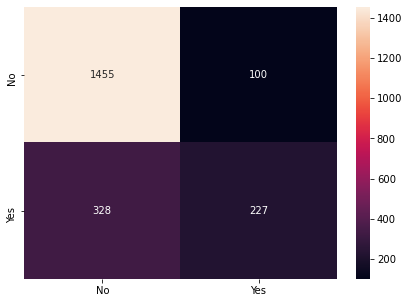

In [49]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble Models

In [144]:
#Ensemble Learning - Bagging


from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=200,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8018957345971564


<AxesSubplot:>

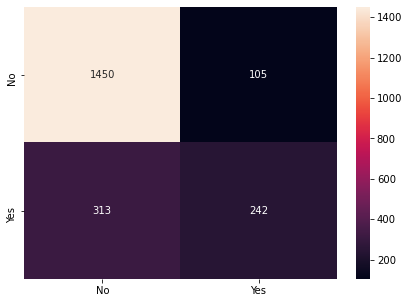

In [145]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [132]:
#Ensemble Learning - AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=200, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8023696682464455


<AxesSubplot:>

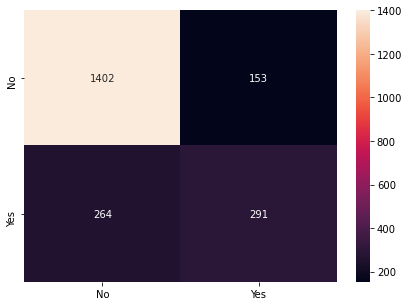

In [133]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [102]:
#Ensemble Learning - GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 75,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8023696682464455


<AxesSubplot:>

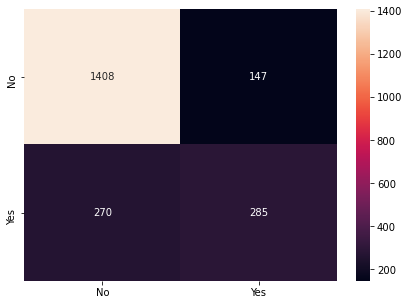

In [103]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [140]:
#Ensemble RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=5)
rfcl = rfcl.fit(X_train, y_train)

0.7815165876777251


<AxesSubplot:>

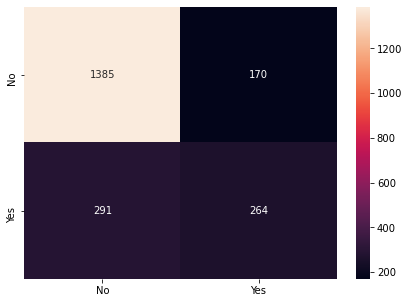

In [141]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

The final best trained **ensemble** model was **AdaBoosting Classifier** with an accuracy of 80.237%. This model was selected because it correctly classified the most positive Churns which was intended.

### 6. Conclusion and improvisation: [ Score: 5 point ]

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
telecom operator to perform a better data analysis in future.

Conclusion on the result is that AdaBoosting Classifier is much more reliable than the Gradient Boosting Classifier, with same accuracies, because AdaBoosting serves the purpose of detecting more positive Churns accurately and hence serves to identify the potential customers who have a higher probability to churn which will help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention.

My suggestion for improvements on the data points collected by the telecom operator to perform a better data analysis in future would be that the data must be accompanied with notes on the type of missing data as for instance " " a blank space in some of the rows of "TotalCharges" which would have saved a lot of time. Also the rows with blanks in the data would have contributed to the training which would have made the Classifier more efficient in predicting more datapoints more effectively. Therefore, the operator must have mentioned a minimum tenure of new customers for which the customers intend to pay initially for and hence the TotalCharges would not have been a blank space. Furthermore, the notes could also accompany with the types of entries for categorical attributes which would have saved a lot of time and effort since during creation of data this would not take much effort to mention the unique types of entries for each of the categorical attributes. 